# Mix 'Em Up

Project 2 - Shahed Hanif

## Introduction

Shuffling a deck of cards is a simple yet fascinating process that generates a unique arrangement of cards each time. While shuffling may seem like a straightforward task, the randomness it produces is essential for ensuring that the game of cards remain fair and unpredictable. From the casual game of poker with friends to high-stakes tournaments, shuffling plays a critical role in determining the outcome of the game. However, the concept of randomness in shuffling is not always easy to understand or quantify, and it has captured the attention of mathematicians and scientists for centuries.

In this report, we will study the randomness of shuffling a deck of cards. The shuffling methods we will study are the classic riffle, middle out method, top-to-bottom re-stack, and the over-under re-stack.

Our first objective will be to produce an ordered deck of cards (as well as a random deck) to see how our shuffling methods change the randomness of a new deck order over many iterations of the shuffle. 

Next we will try to emulate how shuffling methods in real life work by extensively using the `random` library and creating a Python function for each.

We will have to define a proper measure of randomness, so we will also be creating a formula that correctly calculates the randomness of the decks generated using the average distance between adjacent pairs of cards as well as between every other pair of cards.

Lastly, we will observe the average randomness of each of the shuffling methods on an ordered deck of cards, see which shuffling method reaches an acceptable level of randomness the fastest, and finally, we will look at how alternating the shuffling methods impacts the randomness.

## Deck of Cards

To start things off, we need to create a standard deck of 52 cards. When you open a fresh new pack of cards before its been handled, cut, or shuffled it comes in the standard new deck order. We will assign each card in the new deck order an integer from 1 to 52.

The function `deck` below will generate a new deck order of $n$ cards and we will repeatedly use this function to analyze several of the shuffling methods.

In [429]:
# Generate a list of integers from 1 to n
def ordered_deck(n):
    ordered_deck = [i for i in range(1, n+1)]
    return ordered_deck

Here is our new deck order, we will be using this function extensively!

In [428]:
print(ordered_deck(52))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


### Random Deck

We may also want to have a random deck of cards to test the behavior of our shuffling methods to determine whether or not they undo the randomness.

The function `random_deck` below generates a random deck of $n$ cards.

In [280]:
def random_deck(n):
    # Create a list containing an ordered deck of 52 cards, where each card is represented by an integer from 1 to 52
    deck = [i for i in range(1, 52+1)]

    # Generates a random deck of n cards without repeats
    random_deck = []
    for i in range(n):
        # Select a random index from the remaining cards in the deck
        card_index = random.randint(0,len(deck)-1)
        # Append the card at the selected index to the random deck
        random_deck.append(deck[card_index])
        # Remove the selected card from the deck to avoid duplicates
        deck.pop(card_index)
    
    # Return the list of n randomly selected cards
    return random_deck

## Shuffling Methods

There are many shuffling methods to consider, but for this report we will study the classic riffle, middle-out, top-to-bottom re-stack, and a custom shuffle, called the over-under re-stack. The purpose of this section will be to define several Python functions that take in a deck of cards as input and output a shuffled deck of cards using the different shuffling methods aforementioned.

Some of these shuffling methods as you will see require extensive use of probability distributions and ways to incorporate some degree of variation or randomness. To do this we will make use of the functions `randint` and `binomial`. It is crucial to understand how the shuffling methods are defined using these two functions to see how it impacts the randomness of our deck, so here are some ways we will be using these two functions:

`randint` will help us generate a random integer corresponding to a card in our deck or model a scenario in which the probability is 50%, amongst other scenarios that will become apparent.

To introduce a more realistic distribution of card counts when dividing a deck into multiple sections, `binomial` can be employed to model the variability that arises from random chance by taking values from a binomial distribution. It is unrealistic to assume that each section will contain an equal number of cards.

In [281]:
# Import needed libraries and functions to create shuffling methods
import random
from numpy.random import binomial

### Classic Riffle

To perform a classic riffle, the deck is divided into two roughly equal halve and a new deck from the bottom up by randomly choosing either the bottom card from the left or right hand, and repeating this process until one hand has exhausted all its cards. In the event that one hand empties out before the other, any leftover cards from the other hand are placed on top of the newly constructed deck.

The function `classic_riffle` takes in a deck of cards and outputs a shuffled deck using the classic riffle method.

In [282]:
def classic_riffle(deck):
    # Determine # of cards in deck
    n = len(deck)
    
    # Determine # of cards to include in each half of deck using binomial distribution
    split = binomial(n,0.5)
    
    # Divide the deck roughly into halves
    half_1 = deck[:split]
    half_2 = deck[split:]
    
    # Perform a classic riffle shuffle on the two halves of the deck
    shuffled_deck = []
    while half_1 and half_2: # Reference [1]
        # Select a card from the bottom of either half with a 0.5 probability
        if random.randint(0,1) == 0:
            shuffled_deck.append(half_1.pop(0))
        else:
            shuffled_deck.append(half_2.pop(0))
            
    # Leftover cards in either half of deck add to shuffled deck unaltered
    if half_1:
        shuffled_deck.extend(half_1)
    else:
        shuffled_deck.extend(half_2)
    
    # Return the shuffled_deck
    return shuffled_deck

As a demonstration, let's use our function on the new deck order. Each time you run this function you will notice that the final few cards are oftentimes left untouched preventing our deck from being truly random. Later we will observe how this impacts the measure of randomness.

In [283]:
print(classic_riffle(ordered_deck()))

[29, 30, 31, 1, 2, 3, 32, 4, 5, 6, 7, 8, 33, 34, 35, 9, 10, 11, 36, 37, 12, 13, 14, 15, 16, 38, 39, 17, 18, 40, 41, 42, 43, 44, 19, 20, 45, 46, 47, 21, 48, 22, 23, 24, 49, 25, 26, 50, 27, 28, 51, 52]


### Middle-Out

The middle-out method involves dividing the deck roughly into thirds, after which the middle third is placed either on the top or bottom of the deck.

The function `middle_out` takes in a deck of cards and outputs a shuffled deck using this method. The function assumes that the deck is split into thirds at the same time.

In [284]:
def middle_out(deck):
    # Determine # of cards in deck
    n = len(deck)
    
    # Determine # of cards to include in each third of deck
    breakpoint_1 = binomial((n // 3)*2,0.5)
    breakpoint_2 = binomial((n // 3)*2,0.5) + n // 3 # Shift breakpoint point by roughly a third
    
    # Divide the deck roughly into thirds
    third_1 = deck[:breakpoint_1]
    third_2 = deck[breakpoint_1:breakpoint_2]
    third_3 = deck[breakpoint_2:]
    
    # Place middle third on top or bottom of deck with 0.5 probability
    if random.randint(0,1) == 0:
        shuffled_deck = third_2 + third_1 + third_3 # on top
    else:
        shuffled_deck = third_1 + third_3 + third_2 # on bottom
    
    # Return the shuffled_deck
    return shuffled_deck

Here's the result of the middle-out method on the new deck order. You will notice that it is not a very good way of shuffling a deck of cards as the order of the cards are mostly intact, so we can assume that its measure of randomness will be less than that of the classic riffle.

In [373]:
print(middle_out(ordered_deck(52)))

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


### Top-to-bottom Re-stack

In the top-to-bottom re-stack, a deck of cards is divided into a random number of sections with a random number of cards. Then, the order of the deck is rearranged by reversing the order of the sections.

Below is the function `topbottom_restack` which takes in a deck of cards and outputs a shuffled deck. The function is defined such that a section can have anywhere from 1 to 52 cards. The function first randomly determines how many cards to include in the first section, then moves on to calculate the cards for the remaining sections until there are no cards left in the deck.

In [286]:
def topbottom_restack(deck):
    
    # List to hold all sections of deck
    sections = []
    
    # Loop until all cards of the deck have been included in a section
    while deck:
        # Determine a random number of cards for next section
        section_cards = random.randint(1, len(deck))
        # Add next section of cards to list of sections
        sections.append(deck[:section_cards])
        # Remove cards we just added to the section from the deck
        deck = deck[section_cards:]
    
    # Reverse the order of the sections
    sections.reverse()
    
    # Combine all the sections into one shuffled deck
    shuffled_deck = []
    for i in range(len(sections)):
        shuffled_deck.extend(sections[i])
    
    # Return the shuffled deck
    return shuffled_deck

Let's see the top-bottom re-stack in action! Below is an example of the top-bottom re-stack applied to the new deck order.

In [372]:
print(topbottom_restack(ordered_deck(52)))

[51, 52, 48, 49, 50, 39, 40, 41, 42, 43, 44, 45, 46, 47, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


### Over-under Re-stack

The over-under re-stack is admittedly the slowest shuffle here whereby you repeatedly take the top and bottom card of the deck and place both of them in a new pile until there are no more cards in the original deck. There is very little random variation in this shuffle, it is pretty much precise.

The function `overunder` below is in charge of performing this tedious shuffle on a deck of cards.

In [307]:
def overunder(deck):
    shuffled_deck = []
    
    # Loop until all the cards in the original deck are in the new pile
    while len(deck) > 0:
        # Remove the top card from the deck and add it to the new pile of cards
        top_card = deck.pop(0)
        shuffled_deck.append(top_card)
        # If there are still cards left in the deck, remove the bottom card and add it to the deck
        if len(deck) > 0:
            bottom_card = deck.pop()
            shuffled_deck.append(bottom_card)
            
    # Return the shuffled deck.
    return shuffled_deck

A shuffled new deck order using the over-under re-stack is shown below. The result ends up being pretty much like a perfect riffle, we'll see later why we have chose this particular shuffle!

In [374]:
print(overunder(ordered_deck(52)))

[1, 52, 2, 51, 3, 50, 4, 49, 5, 48, 6, 47, 7, 46, 8, 45, 9, 44, 10, 43, 11, 42, 12, 41, 13, 40, 14, 39, 15, 38, 16, 37, 17, 36, 18, 35, 19, 34, 20, 33, 21, 32, 22, 31, 23, 30, 24, 29, 25, 28, 26, 27]


## Measuring Randomness of a Deck of Cards

The concept of randomness is not always easy to define, and how it is quantified can depend on the context in which it is used. In the case of shuffling a deck of cards, we can start with a measure of randomness that is based on the average distances between adjacent integers given by the formula below for a list of integers in the form $[n_1,n_2,...,n_k]$.

$$\frac{1}{k}\sum_{i=1}^{k-1} |n_{i+1} - n_{i}|$$

However, there is one drawback to this measure. If we consider a deck of cards that alternates between the numbers 1-26 and 27-52, while incrementing each number by 1 as seen below:

$$[1,27,2,28,3,29,4,30,...,26,52]$$

the measure of randomness using the formula above is about 23.25, which is pretty high (higher than a fairly random deck, you can check for yourself). One way to modify the formula to avoid this drawback is to compute the average distances between adjacent integers, as well as the average distances between every other pair of integers, which directly addresses the example deck above. This can be done by computing the sum of the absolute differences between every pair of adjacent integers, and dividing by the total number of pairs, which is $k-1$. Thus, the formula we will use is the following:

$$\frac{1}{k-1}\left[\sum_{i=1}^{k-1} |n_{i+1} - n_{i}| + \sum_{i=1}^{k-2} |n_{i+2} - n_{i}| \right]$$

The function `randomness()` will use this formula to compute a value representing how random a deck just as we described.

In [370]:
def randomness(deck):
    # Calculate the length of the deck
    k = len(deck)
    
    # Calculate the sum of the absolute differences between adjacent pairs of integers
    sum_1 = sum(abs(deck[i+1]-deck[i]) for i in range(k-1))
    
    # Calculate the sum of the absolute differences between pairs of integers that are two positions apart
    sum_2 = sum(abs(deck[i+2]-deck[i]) for i in range(k-2))
    
    # Calculate the modified measure of randomness
    randomness = (sum_1 + sum_2)/(k-1)
    
    # Return the modified measure of randomness
    return randomness

Let's do a quick check to make sure that this formula makes sense! We should expect that the example deck above is not any more random than a truly random deck of cards, which we can generate using our handy function `random_deck`. We can also quickly test the randomness of our shuffling methods for a single shuffle of the new deck order.

In [364]:
# Deck to check if our measure of randomness makes sense
example_deck = [1, 27, 2, 28, 3, 29, 4, 30, 5, 31, 6, 32, 7, 33, 8, 34, 9, 35, 10, 36, 11, 37, 12, 38, 13, 39, 14, 40, 15, 41, 16, 42, 17, 43, 18, 44, 19, 45, 20, 46, 21, 47, 22, 48, 23, 49, 24, 50, 25, 51, 26, 52]

print('Randomness of particular decks')
print('new deck order: ' + str(randomness(ordered_deck())))
print('example deck:   ' + str(randomness(example_deck)))
print('random deck:  ' + str(randomness(random_deck(52))))
print('-------------------------------------------------------------------------')
print('Randomness of one shuffle of the new deck order')
print('classic riffle:      ' + str(randomness(classic_riffle(ordered_deck()))))
print('middle-out method:   ' + str(randomness(middle_out(ordered_deck()))))
print('top-bottom re-stack: ' + str(randomness(topbottom_restack(ordered_deck()))))
print('over-under re-stack: ' + str(randomness(overunder(ordered_deck()))))


Randomness of particular decks
new deck order: 2.9607843137254903
example deck:   26.49019607843137
random deck:  37.35294117647059
-------------------------------------------------------------------------
Randomness of one shuffle of the new deck order
classic riffle:      28.0
middle-out method:   6.294117647058823
top-bottom re-stack: 6.627450980392157
over-under re-stack: 26.980392156862745


As you can see, the randomness of the new deck order is essentially zero from the definition of our measure of randomness, that is to say that it has the least measure of randomness. The real sign of improvement in our measure is having the randomness of a random deck be greater than the example deck we were looking at, which is not entirely random.

The results of each shuffling methods is subject to change each time, so do not take these results to mean that one shuffling method is better than the other. We will analyze this later in this report!

### Measuring Randomness of Shuffling Methods

In order to decide what shuffling method is the best, we can perform 100 shuffles of each shuffling method (not consecutively) on the new deck order. First, we will generate our data that will be plotted later.

In [376]:
# Create a list that will correspond to 100 trials of each shuffling method
shuffles = [i for i in range(1, 101)]

# Create a list of the randomness of each shuffling method on the new deck order 100 times each
riffle_randomness = [randomness(classic_riffle(ordered_deck(52))) for i in range(1, 101)]
middleout_randomness = [randomness(middle_out(ordered_deck(52))) for i in range(1, 101)]
topbottomrestack_randomness = [randomness(topbottom_restack(ordered_deck(52))) for i in range(1, 101)]
overunder_randomness = [randomness(overunder(ordered_deck(52))) for i in range(1, 101)]

Now, using the data we have generated above we can generate a plot to study how well the shuffling methods shuffle a new deck order on the first try.

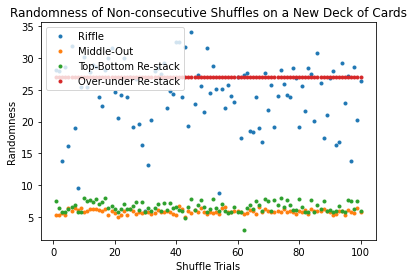

In [377]:
import matplotlib.pyplot as plt

# plot the highest # reached of each finite sequence as a function of k
plt.plot(shuffles,riffle_randomness,'.', label = 'Riffle')
plt.plot(shuffles,middleout_randomness,'.', label = 'Middle-Out')
plt.plot(shuffles,topbottomrestack_randomness,'.', label = 'Top-Bottom Re-stack')
plt.plot(shuffles,overunder_randomness,'.', label = 'Over-under Re-stack')
plt.title('Randomness of Non-consecutive Shuffles on a New Deck of Cards')
plt.xlabel('Shuffle Trials')
plt.ylabel('Randomness')

plt.legend(loc = 'upper left')

plt.show() # hides unnecesary output

Ignoring the over-under restack for a second, we probably expected the riffle shuffle to be the best shuffling method to use for the most part. A close second is the top-bottom re-stack and last, the middle-out method. There's nothing special about the over-under re-stack as of yet since there is no variation in how you can shuffle a new deck order each time. Though it may be tedious, it doesn't seem like a completely terrible method to use on the first try based on our results here.

#### Average Randomness of Shuffling Methods

Now let's take a look at the average randomness for each shuffling method from the plot above. We will use the function `mean` from the `statistics` library to compute the averages.

In [426]:
from statistics import mean

print('Average Randomness of Shuffles for 100 Trials')
print('---------------------------------------------')
print('Riffle               ' + str(mean(riffle_randomness)))
print('Middle-Out:          ' + str(mean(middleout_randomness)))
print('Top-Bottom Re-stack: ' + str(mean(topbottomrestack_randomness)))
print('Over-under Re-stack: ' + str(mean(overunder_randomness)))

Average Randomness of Shuffles for 100 Trials
---------------------------------------------
Riffle               24.09372549019608
Middle-Out:          5.8352941176470585
Top-Bottom Re-stack: 6.573529411764706
Over-under Re-stack: 26.980392156862745


Just like that, these averages do indeed confirm our analysis of the plot.

### Most Efficient Shuffling Method

We might want to ask ourselves what shuffling method randomizes the cards faster. Afterall, we don't want to be shuffling 100 times during a real game, people would lose patience! Thus, let's define several functions to perform the same shuffle method $n$ times on a new deck order.

The following functions `repeat_riffle`, `repeat_middleout`, `repeat_topbottomrestack`, and `repeat_overunder` essentially achieve the purpose as described above and outputs the randomness at each stage of $n$ consecutive shuffles.

In [391]:
def repeat_riffle(n):
    randomness_values = []
    
    # Create a list for the new deck order
    shuffled_deck = ordered_deck(52)
    
    # Perform `n` consecutive shuffles of the new deck order and determine its randomness
    for i in range(1, n+1):
        shuffled_deck = classic_riffle(shuffled_deck)
        randomness_values.append(randomness(shuffled_deck))
    return randomness_values

In [392]:
def repeat_middleout(n):
    randomness_values = []
    
    # Create a list for the new deck order
    shuffled_deck = ordered_deck(52)
    
    # Perform `n` consecutive shuffles of the new deck order and determine its randomness
    for i in range(1, n+1):
        shuffled_deck = middle_out(shuffled_deck)
        randomness_values.append(randomness(shuffled_deck))
    return randomness_values

In [393]:
def repeat_topbottomrestack(n):
    randomness_values = []
    
    # Create a list for the new deck order
    shuffled_deck = ordered_deck(52)
    
    # Perform `n` consecutive shuffles of the new deck order and determine its randomness
    for i in range(1, n+1):
        shuffled_deck = topbottom_restack(shuffled_deck)
        randomness_values.append(randomness(shuffled_deck))
    return randomness_values

In [394]:
def repeat_overunder(n):
    randomness_values = []
    
    # Create a list for the new deck order
    shuffled_deck = ordered_deck(52)
    
    # Perform `n` consecutive shuffles of the new deck order and determine its randomness
    for i in range(1, n+1):
        shuffled_deck = overunder(shuffled_deck)
        randomness_values.append(randomness(shuffled_deck))
    return randomness_values

Below we are storing our values for 100 consecutive shuffles of each shuffle method in convenient variables for use in our plot.

In [395]:
repeated_riffles = repeat_riffle(100)
repeated_middleouts = repeat_middleout(100)
repeated_topbottomrestacks = repeat_topbottomrestack(100)
repeated_overunders = repeat_overunder(100)

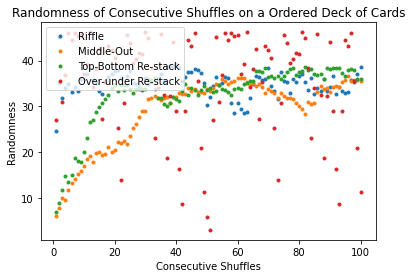

In [417]:
# Plot the randomness of the deck as a function of the number of consecutive shuffles
plt.plot(shuffles,repeated_riffles,'.', label = 'Riffle')
plt.plot(shuffles,repeated_middleouts,'.', label = 'Middle-Out')
plt.plot(shuffles,repeated_topbottomrestacks,'.', label = 'Top-Bottom Re-stack')
plt.plot(shuffles,repeated_overunders,'.', label = 'Over-under Re-stack')

plt.title('Randomness of Consecutive Shuffles on a Ordered Deck of Cards')
plt.xlabel('Consecutive Shuffles')
plt.ylabel('Randomness')

plt.legend(loc = 'upper left')

plt.show() # hides unnecesary output

Now we can pay attention to the over-under re-stack, which oftentimes makes the randomness of the deck being shuffled drop even as close to the randomness of a new deck order, which as we determined before to be about 2.96. However, the over-under re-stack is also responsible for producing the highest levels of randomness for consecutive shuffles while the classic riffle, middle-out, and top-bottom re-stack methods tend to hover around 35. So if you're looking to shuffle a deck over let's say 40 times, these methods are your best bet. If you're looking for something more practical then aside from the over-under re-stack, the classic riffle achieves the acceptable level of randomness of around 35 the fastest, followed by the top-bottom re-stack and middle-out methods respectively.

### Alternating Between Shuffling Methods

Let's have some more fun by seeing what happens to the randomness as we alternate the shuffling methods. The function `alternating_shuffles` below will generate the randomness each time a shuffle is performed between two functions.

In [416]:
def alternating_shuffles(shuffle1, shuffle2, n):
    alternating_randomness = []
    
    # Accumulator variable that starts as the new deck order
    shuffled_deck = ordered_deck(52)
    
    # Alternate between using shuffle 1 and shuffle 2 n times and calculate the randomness
    for i in range(n):
        if i % 2 == 0:
            # Call the first shuffle to update the deck
            shuffled_deck = shuffle1(shuffled_deck)
            alternating_randomness.append(randomness(shuffled_deck))
        else:
            # Call the second shuffle to update the deck
            shuffled_deck = shuffle2(shuffled_deck)
            alternating_randomness.append(randomness(shuffled_deck))
    
    # Return the final shuffled deck
    return alternating_randomness

In [423]:
# Alternating randomness data for each pair of shuffles to generate plot
riffle_middle = alternating_shuffles(classic_riffle, middle_out, 100)
riffle_topbottom = alternating_shuffles(classic_riffle, topbottom_restack, 100)
riffle_overunder = alternating_shuffles(classic_riffle, overunder, 100)

middle_topbottom = alternating_shuffles(middle_out, topbottom_restack, 100)
middle_overunder = alternating_shuffles(middle_out, overunder, 100)

topbottom_overunder = alternating_shuffles(topbottom_restack, overunder, 100)

After preparing the randomness data for the alternating shuffle pairs as shown above, we can now generate a plot to see if there is anything interesting.

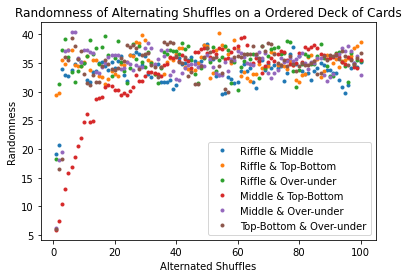

In [424]:
# Plot the randomness of the deck as a function of the number of alternating shuffles
plt.plot(shuffles,riffle_middle,'.', label = 'Riffle & Middle')
plt.plot(shuffles,riffle_topbottom,'.', label = 'Riffle & Top-Bottom')
plt.plot(shuffles,riffle_overunder,'.', label = 'Riffle & Over-under')
plt.plot(shuffles,middle_topbottom,'.', label = 'Middle & Top-Bottom')
plt.plot(shuffles,middle_overunder,'.', label = 'Middle & Over-under')
plt.plot(shuffles,topbottom_overunder,'.', label = 'Top-Bottom & Over-under')

plt.title('Randomness of Alternating Shuffles on a Ordered Deck of Cards')
plt.xlabel('Alternated Shuffles')
plt.ylabel('Randomness')

plt.legend(loc = 'lower right')

plt.show() # hides unnecesary output

Observing the plot shows that alternating the shuffles makes it the randomness reach acceptable values between 30 and 40, although it takes middle and top-bottom (two of the worst shuffling methods as we've seen) a little while to get to that acceptable level of randomness.

## Conclusions

We have been able to study the randomness of many shuffling methods such as the classic riffle, middle-out, top-bottom, and over-under re-stack. The results obtained are very much tied to how we defined our function in python. Our analysis of the average randomness of each shuffling method when used once on a new deck order for 100 trials yielded that the classic riffle and the over-under re-stack randomizes a new deck order to an acceptable level of around 25 and the middle-out and top-to-bottom re-stack shuffle methods were quite ineffective in randomizing the deck on the first try as their average randomness values were below 10.

The most efficient shuffling method by far was the over-under re-stack and classic riffle, which reached an acceptable level of randomness in about 10 consecutive shuffles, where as the middle-out and top-to-bottom re-stack methods reached an acceptable level at around 40 consecutive shuffles. The over-under shuffle produced randomness values that were all over the place suggesting that the randomization of the deck is  randomly undone with consecutive shuffles. The remaining three shuffling methods though on averaged hovered around a randomness value of 35 after about 40 consecutive shuffles.

When we alternated between shuffles we saw that the time to get to an acceptable level of randomness is reduced for all combinations of shuffles. The randomness of the deck for these alternating consecutive shuffles hovered around 30 to 40.

### Limitations & Future Research

For the middle-out method, we defined the function such that the deck is split into thirds using a binomial distribution. It may have been more appropriate to use a bimodal distribution to pick out two positions to split the deck into thirds. Additionally, there may also be a function that can several obtain values from a multimodal distribution. Such a function can be used to divide a deck into $n$ sections by selecting the cards as the start and end of the sections for the top-to-bottom re-stack method. The current function for the top-to-bottom re-stack can divide the deck into 30+ sections, which is not realistic. Usually someone will divide the deck into 5 to 10 sections, so implementing this limitation may be a more practical representation of the shuffle.

## References

[1] https://realpython.com/lessons/while-loops-and-lists/

[2] https://en.wikipedia.org/wiki/Randomness_test